In [1]:
%load_ext autoreload

%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from spikeA.Session import *
from spikeA.Spike_train_loader import Spike_train_loader
from spikeA.Cell_group import Cell_group
from spikeA.Animal_pose import Animal_pose
from spikeA.Session import Session

In [2]:
#name="pk1330-08112021-0101"
#name="pk1330-10112021-0101"
#name="pk1330-16112021-0101"
name="pk1330-12112021-0101"

directory, session = name.split("-",1)
path="/adata/electro/"+directory+"/"+name+"/"

print("Path:",path)

import os
print("directory:", "OK" if os.path.isdir(path) else "invalid")

Path: /adata/electro/pk1330/pk1330-12112021-0101/
directory: OK


Check the files

## Get a Session object and load spikes

In [3]:
ses = Kilosort_session(name=name,path=path)
ses.load_parameters_from_files()
print(ses)

<class 'spikeA.Session.Kilosort_session'>
name = pk1330-12112021-0101
path = /adata/electro/pk1330/pk1330-12112021-0101
subject = pk1330
session_dat_time = 2021-11-12 01:01:00
fileBase = /adata/electro/pk1330/pk1330-12112021-0101/pk1330-12112021-0101
file_names = {'par': '/adata/electro/pk1330/pk1330-12112021-0101/pk1330-12112021-0101.par', 'desen': '/adata/electro/pk1330/pk1330-12112021-0101/pk1330-12112021-0101.desen', 'desel': '/adata/electro/pk1330/pk1330-12112021-0101/pk1330-12112021-0101.desel', 'sampling_rate': '/adata/electro/pk1330/pk1330-12112021-0101/pk1330-12112021-0101.sampling_rate_dat', 'px_per_cm': '/adata/electro/pk1330/pk1330-12112021-0101/pk1330-12112021-0101.px_per_cm', 'params': '/adata/electro/pk1330/pk1330-12112021-0101/params.py', 'amplitudes': '/adata/electro/pk1330/pk1330-12112021-0101/amplitudes.npy', 'channel_map': '/adata/electro/pk1330/pk1330-12112021-0101/channel_map.npy', 'channel_positions': '/adata/electro/pk1330/pk1330-12112021-0101/channel_positions.

In [4]:
stl = Spike_train_loader()
stl.load_spike_train_kilosort(ses)
print("stl.clu_ids",stl.clu_ids)
cg = Cell_group(stl)



stl.clu_ids [ 2  3  4  5  7 11 12]


In [5]:
print("Found ",len(cg.neuron_list), "good clusters (neurons)")

for i,(clu_id, spike_time) in enumerate(zip(stl.clu_ids, stl.spike_times)):
    print("#",i,", id =",clu_id, ", spikes:",len(spike_time))


Found  7 good clusters (neurons)
# 0 , id = 2 , spikes: 9943
# 1 , id = 3 , spikes: 4703
# 2 , id = 4 , spikes: 4879
# 3 , id = 5 , spikes: 4752
# 4 , id = 7 , spikes: 366
# 5 , id = 11 , spikes: 1874
# 6 , id = 12 , spikes: 7801


## Load the waveforms

In [6]:
ses.load_waveforms()

templates.shape (12, 82, 32)
Clusters: 12 timepoints: 82 , Channels: 32


Plot the waveforms for one arbitrary cluster (neuron) on the channels of its highest peak-to-peak amplitudes

In [7]:
cluster = 3
channels = ses.get_channels_from_cluster(cluster)

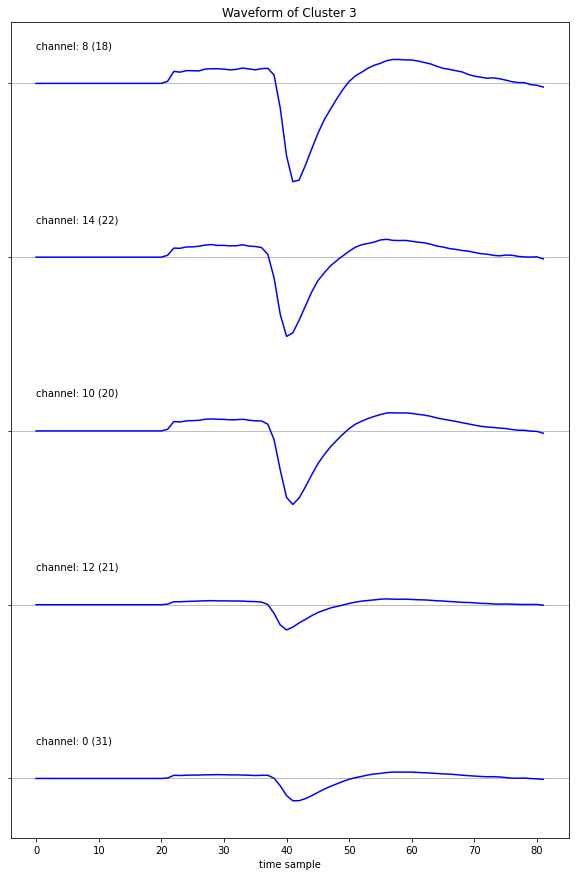

In [8]:
# plot on selected channels

plt.figure(figsize=(10,15))

for i,channel in enumerate(channels):
    
    channel_mapped, waveform = ses.get_waveform(3, channel)
    
    plt.axhline( y = -i*.5 , color="grey" , lw=.5 )
    label = "channel: "+str(channel)+" ("+str(channel_mapped)+")"
    plt.plot( waveform -i*.5 , label=label , color="blue")
    plt.text( s= label , x=0, y=-i*.5 +.1 )
plt.xlabel("time sample")
#plt.legend()
ax = plt.gca()
ax.set(yticklabels=[])  
plt.title("Waveform of Cluster "+str(cluster))
plt.show()

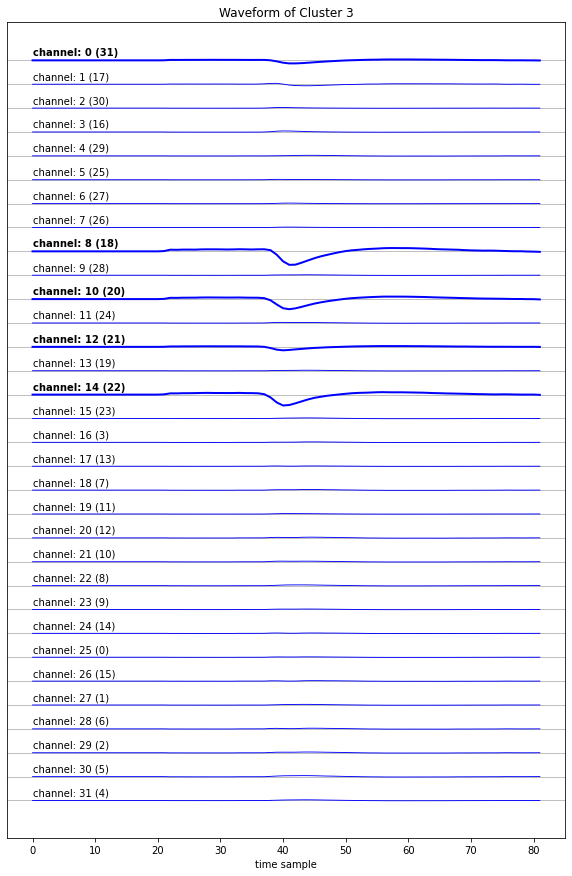

In [9]:
# plot all channels

channels_all = range(ses.n_channels)

plt.figure(figsize=(10,15))

for i,channel in enumerate(channels_all):
    
    channel_mapped, waveform = ses.get_waveform(3, channel)
    
    plot_style = [2.,'bold'] if channel in channels else [.9, 'normal']
    
    plt.axhline( y = -i*.5 , color="grey" , lw=.5 )
    label = "channel: "+str(channel)+" ("+str(channel_mapped)+")"
    plt.plot( waveform -i*.5 , label=label , color="blue" , lw=plot_style[0])
    plt.text( s= label , x=0, y=-i*.5 +.1 , weight=plot_style[1])
plt.xlabel("time sample")
#plt.legend()
ax = plt.gca()
ax.set(yticklabels=[])  # remove the tick labels
ax.set(ylabel=None)  # remove the y-axis label
ax.tick_params(left=False)  # remove the ticks

plt.title("Waveform of Cluster "+str(cluster))
plt.show()

## Create a pose file 

In [10]:
ap = Animal_pose(ses)
if not os.path.exists(f"{ses.fileBase}.pose.npy"):
    print("load from positrack")
    ap.pose_from_positrack_files(ses=ses, interpolation_frequency_hz = 50, extension="positrack")
    ap.save_pose_to_file() # save the file for next time
else:
    print("load from saved pose file")
    ap.load_pose_from_file()

load from saved pose file


Plot the path of the animal to see if it was loaded correctly.

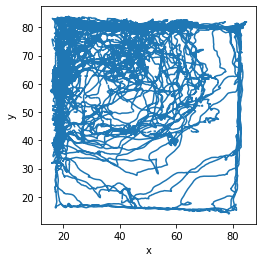

In [11]:
plt.plot(ap.pose[:,1],ap.pose[:,2])
plt.xlabel("x")
plt.ylabel("y")
plt.gca().set_aspect('equal', adjustable='box')

Plot the occupancy map to see where the animal spent more or less time.

(The image seems mirrored since the x/y-axis for imshow is different compared to the plot function.)

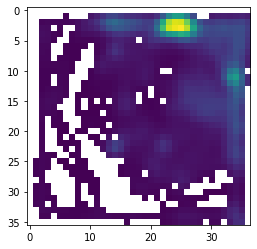

In [12]:
ap.occupancy_map_2d()
plt.imshow(ap.occupancy_map)
plt.show()

Plot the head-direction of the animal and its position a short segment.

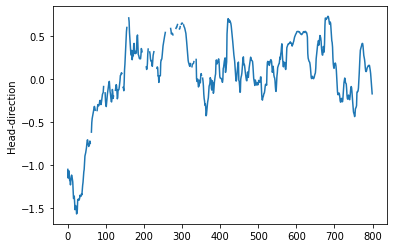

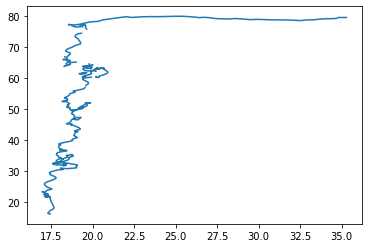

In [13]:
s=3000
e=3800
plt.plot(ap.pose[s:e,4])
plt.ylabel("Head-direction")
plt.show()
plt.plot(ap.pose[s:e,1],ap.pose[s:e,2])

Now we need to set the SpatialProperties object of each Neuron objects of the CellGroup.
Then we can get information score for each neuron from a firing rate map without smoothing.
We recalculate the maps with smoothing for display purposes.

Text(0.5, 0, 'Head direction (deg)')

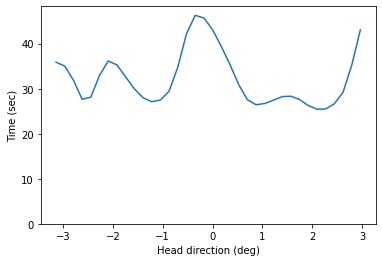

In [14]:
ap.head_direction_occupancy_histogram()
plt.plot(ap.hd_occupancy_bins[:-1],ap.hd_occupancy_histogram)
plt.ylim(0,np.max(ap.hd_occupancy_histogram)+2)
plt.ylabel("Time (sec)")
plt.xlabel("Head direction (deg)")

Loop for our neurons and do the analysis we need to know if we have spatially selective neurons or head-direction cells

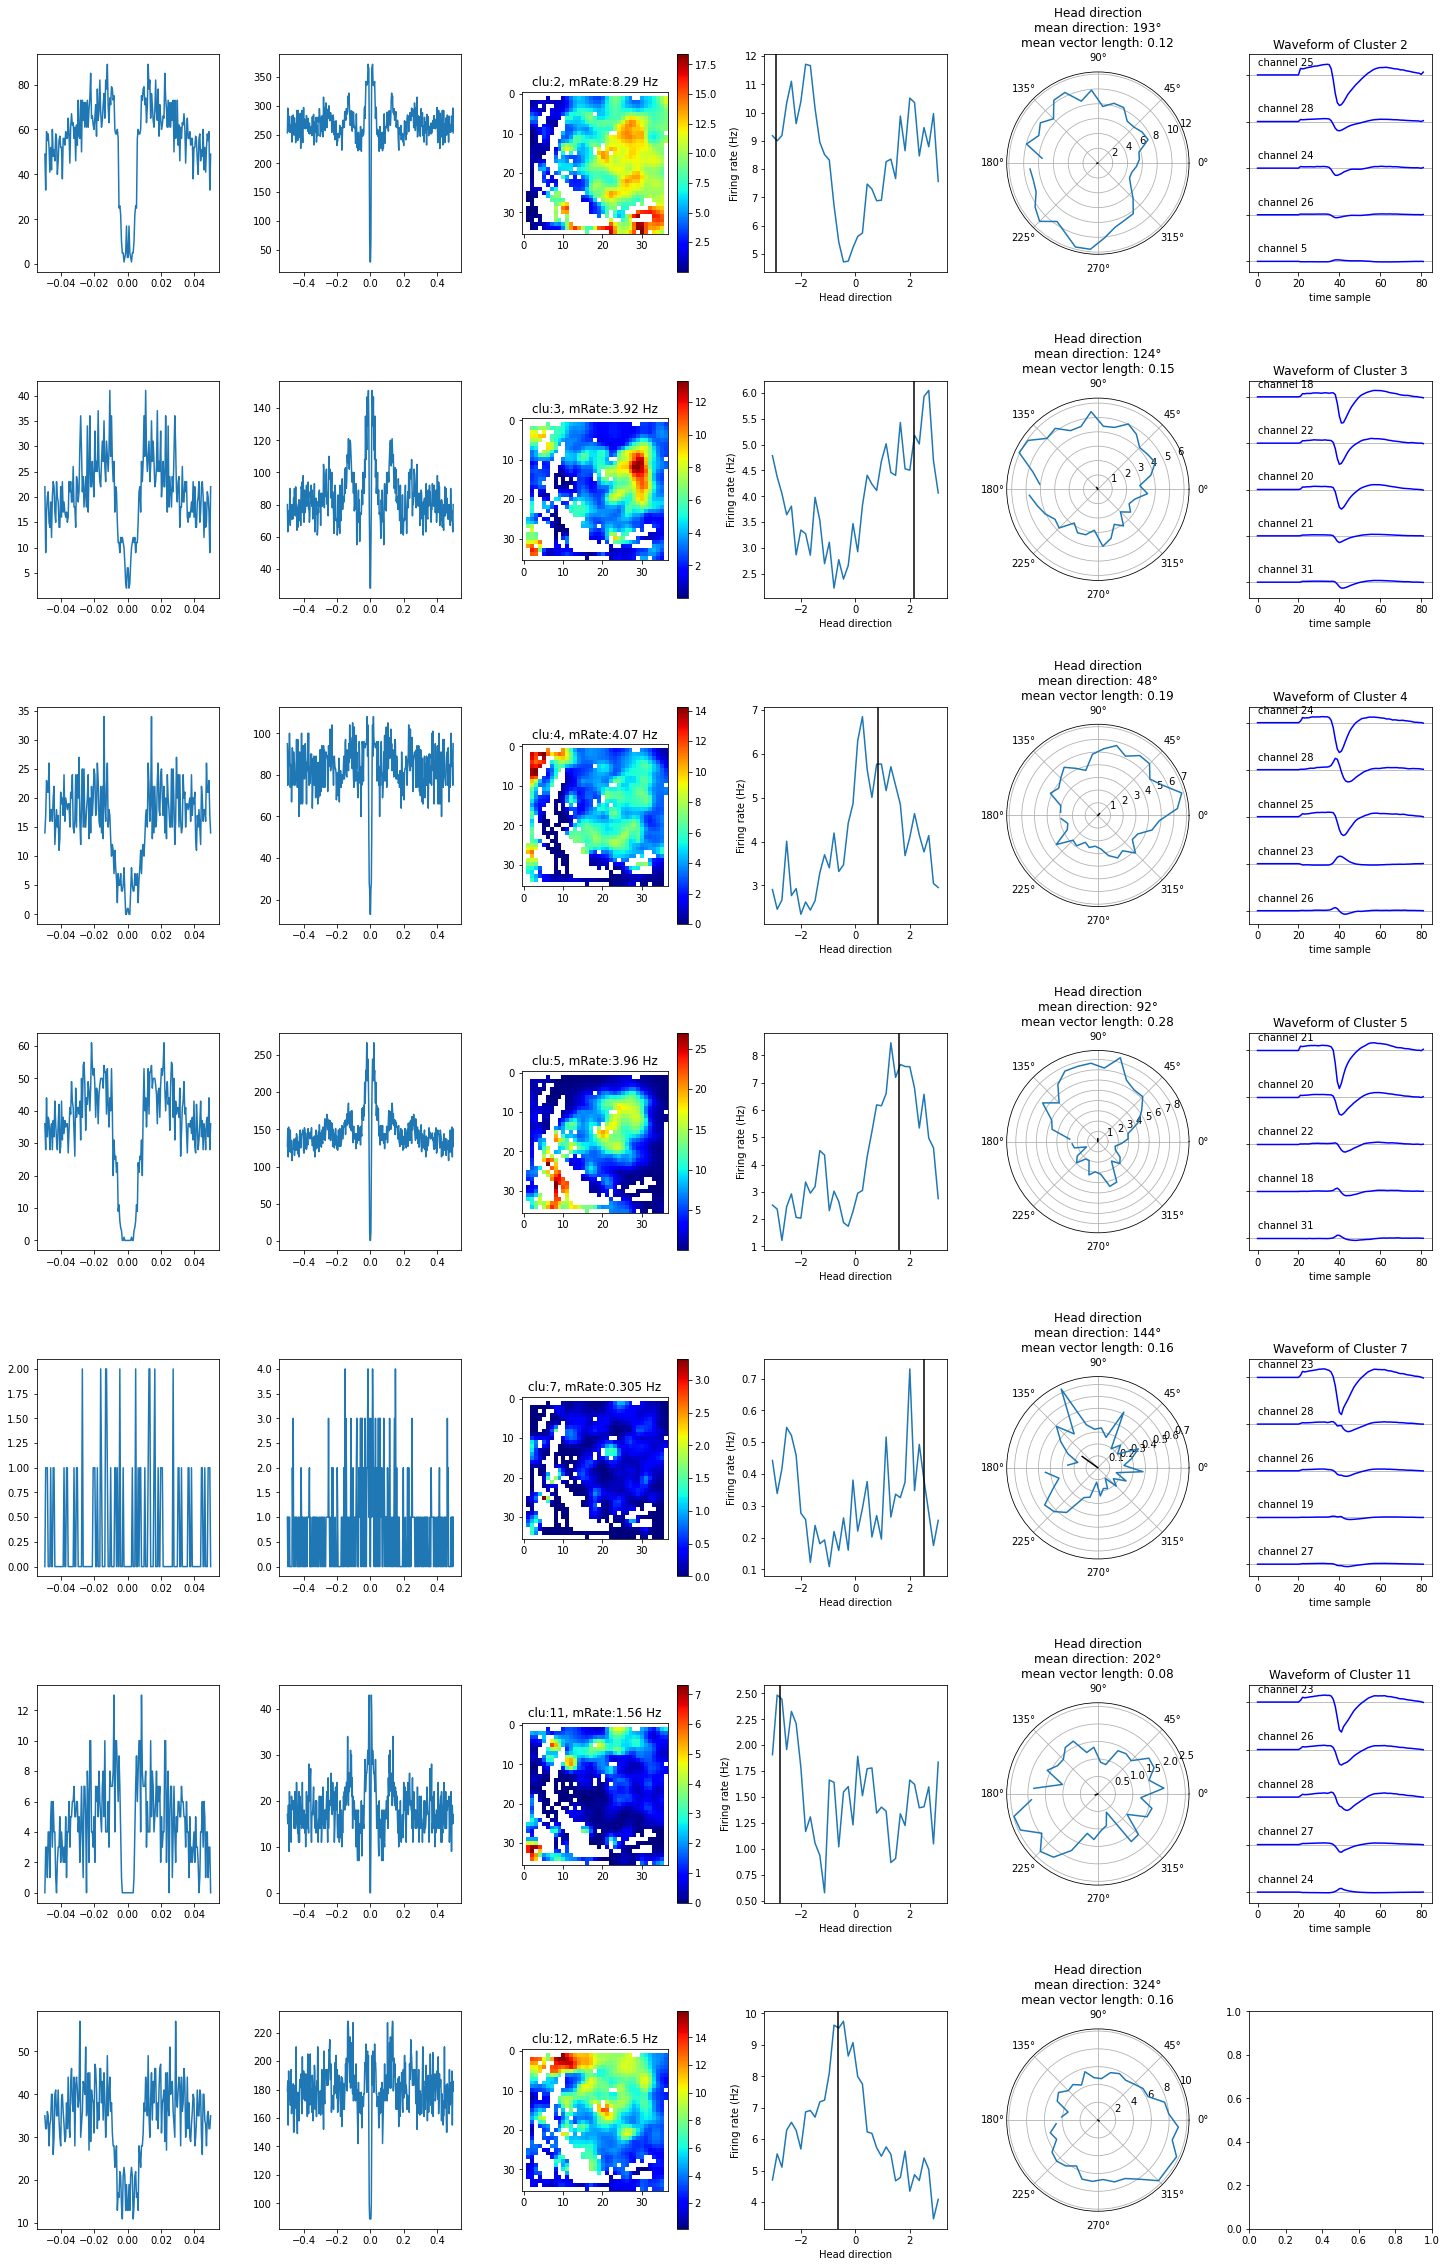

In [15]:
cols = 6

fig, axs = plt.subplots(len(cg.neuron_list), cols, figsize=(25,40))
   
for i, n in enumerate(cg.neuron_list):
       
    n.spike_train.spike_time_autocorrelation(bin_size_sec=0.0005,min_sec=-0.05, max_sec=0.05)
    timestamp = n.spike_train.mid_point_from_edges(n.spike_train.st_autocorrelation_histogram[1])
    axs[i,0].plot(timestamp, n.spike_train.st_autocorrelation_histogram[0])
    
    n.spike_train.spike_time_autocorrelation(bin_size_sec=0.0025,min_sec=-0.5, max_sec=0.5)
    timestamp = n.spike_train.mid_point_from_edges(n.spike_train.st_autocorrelation_histogram[1])
    axs[i,1].plot(timestamp, n.spike_train.st_autocorrelation_histogram[0])
    
    n.spike_train.unset_intervals()
    ap.unset_intervals()
    n.spike_train.set_intervals(ses.trial_intervals.inter)
    ap.set_intervals(ses.trial_intervals.inter)
    
    n.set_spatial_properties(ap)
    n.spatial_properties.firing_rate_map_2d(cm_per_bin =2, smoothing_sigma_cm = 2, smoothing=True)
    im = axs[i,2].imshow(n.spatial_properties.firing_rate_map,cmap='jet')
    axs[i,2].set_title("clu:{}, mRate:{:.3} Hz".format(n.name,n.spike_train.mean_firing_rate()))
    fig.colorbar(im,ax=axs[i,2])
    
    
    
    # Head direction
    
    n.spatial_properties.firing_rate_head_direction_histogram(smoothing=False)
    
    angles = n.spatial_properties.mid_point_from_edges(n.spatial_properties.firing_rate_head_direction_histo_edges)
    hd_firing = n.spatial_properties.firing_rate_head_direction_histo
    hd_mean_direction_rad, hd_mean_direction_deg, hd_mean_vector_length = n.spatial_properties.head_direction_score()
    
    axs[i,3].plot(angles, hd_firing)
    axs[i,3].set_xlabel("Head direction")
    axs[i,3].set_ylabel("Firing rate (Hz)")
    #axs[i,3].set_ylim(0,np.max(n.spatial_properties.firing_rate_head_direction_histo)+1)
    axs[i,3].axvline(x=hd_mean_direction_rad, color="black")
    #axs[i,3].text(s=str(round(hd_mean_direction_rad*180./np.pi))+" ° (vector length = "+str(hd_mean_vector_length)+")",x=hd_mean+.1,y=1)
    
    axs[i,4].axis('off')
    ax2 = fig.add_subplot(len(cg.neuron_list), cols, cols*(i+1)-1, polar=True)
    ax2.plot(angles, hd_firing)
    #ax2.axvline(hd_mean_direction_rad, hd_mean_vector_length, color="black")
    ax2.plot([hd_mean_direction_rad]*2, [0,hd_mean_vector_length] , color="black" )
    ax2.set_title("Head direction" + "\n" + "mean direction: " + str(round( (hd_mean_direction_deg + 360) % 360  )) +"°" + "\n" + "mean vector length: " + str(np.round(hd_mean_vector_length,2)) ) 
    ax2.grid(True)
    
    
    # Wavefroms
    
    cluster = int(n.name) # current cluster name
    channels = ses.get_channels_from_cluster(cluster) # get channels with highest amplitude
    
    if (len(channels)):
    
        for j,channel in enumerate(channels):
            channel_mapped, waveform = ses.get_waveform(cluster, channel)
            axs[i,5].axhline( y = -j*.5 , color="grey" , lw=.5 )
            #label = "channel: "+str(channel)+" ("+str(channel_mapped)+")"
            label = "channel "+str(channel_mapped)
            axs[i,5].plot( waveform -j*.5 , label=label , color="blue")
            axs[i,5].text( s= label , x=0, y=-j*.5 +.1 )
        axs[i,5].set_xlabel("time sample")
        axs[i,5].set(yticklabels=[])  
        axs[i,5].set_title("Waveform of Cluster "+str(cluster))
    
    
    
#plt.tight_layout()
fig.subplots_adjust(wspace=0.33, hspace=.5)
#plt.savefig('/home/pascal/Downloads/'+name+'.pdf')
plt.show()
